In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('mtcars.csv') #importing the dataset

In [4]:
correlations = df.corr()['mpg'].drop('mpg') #corr amongst the data points mpg(dependent variable) depends on
most_correlated = correlations.abs().sort_values(ascending=False)
print("Most correlated variables with mpg:\n", most_correlated)

Most correlated variables with mpg:
 wt      0.867659
cyl     0.852162
hp      0.776168
drat    0.681172
vs      0.664039
disp    0.629274
am      0.599832
carb    0.550925
gear    0.480285
qsec    0.418684
Name: mpg, dtype: float64


Intuition of correlation: The variable on which the mpg(dependent variable) depends on is wt, followed by cyl, hp.

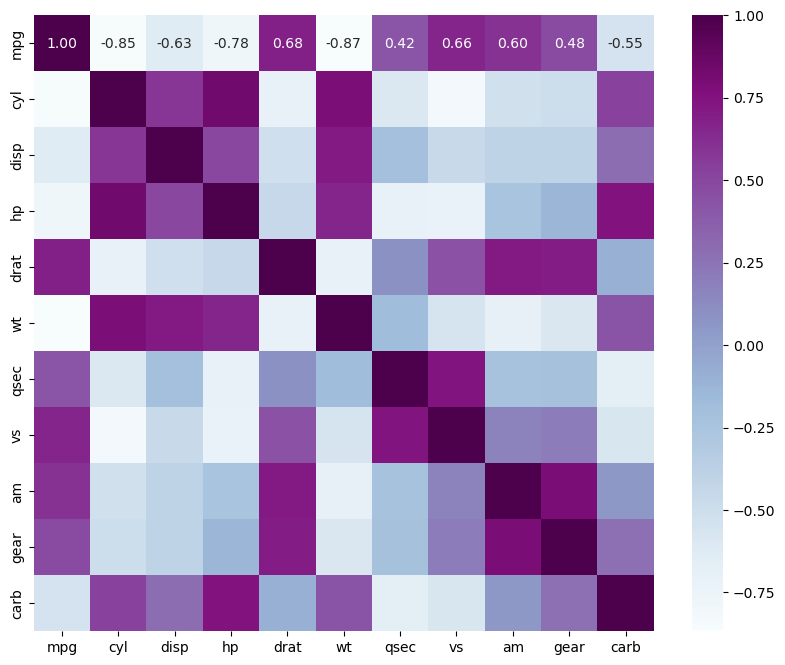

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='BuPu', fmt=".2f")
plt.show()

# Data Preprocessing

In [6]:
df.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


#### Finding the null values in the dataset

In [7]:
df.isnull().sum() #checking for missing values

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [8]:
df.shape

(32, 11)

##### Finding duplicates, if any

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

##### Checking for Outliers

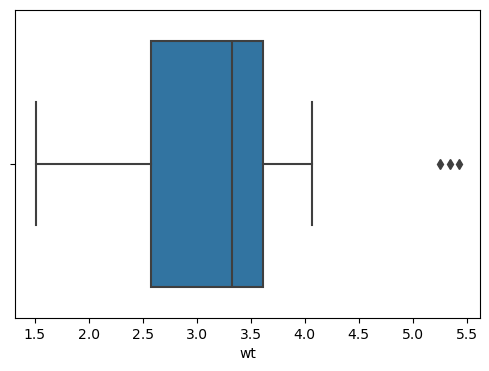

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['wt'])
plt.show() #checking for outliers using box plot

In [12]:
Q1 = df['wt'].quantile(0.25)
Q3 = df['wt'].quantile(0.75)
IQR = Q3 - Q1


In [13]:
Q1 = df['hp'].quantile(0.25)
Q3 = df['hp'].quantile(0.75)
IQR = Q3 - Q1


In [14]:
is_outlier = ((df['hp'] < (Q1 - 1.5 * IQR)) | (df['hp'] > (Q3 + 1.5 * IQR)))
df = df[~is_outlier].reset_index(drop=True)

In [15]:
is_outlier = ((df['wt'] < (Q1 - 1.5 * IQR)) | (df['wt'] > (Q3 + 1.5 * IQR)))
df_no_outliers = df[~is_outlier].reset_index(drop=True)

In [16]:
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)

Original dataset shape: (31, 11)
Dataset shape after removing outliers: (31, 11)


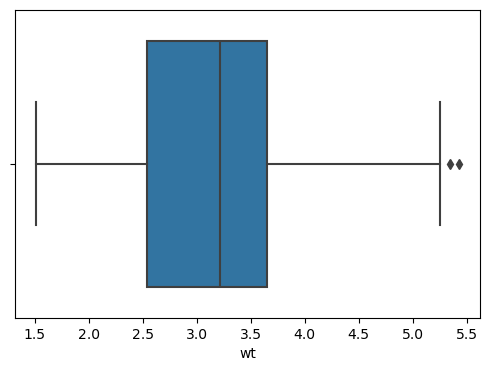

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_no_outliers['wt'])
plt.show()

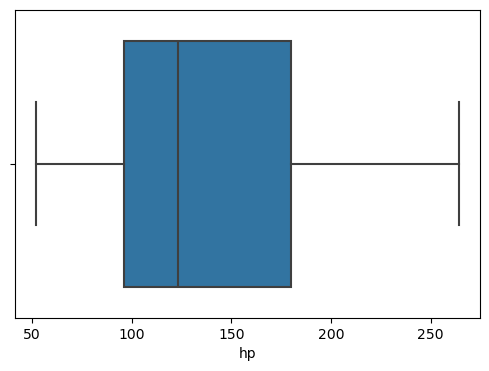

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_no_outliers['hp'])
plt.show()

In [19]:
df_no_outliers

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


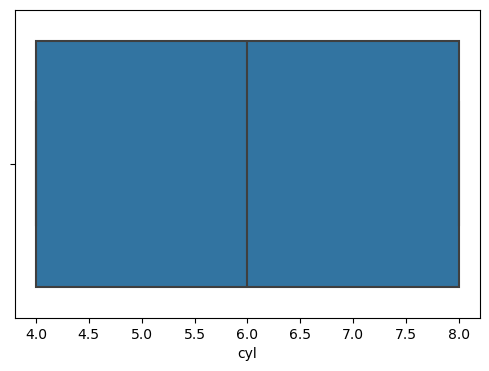

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_no_outliers['cyl'])
plt.show()

#### EXPLORATORY DATA ANALYSIS

In [21]:
#EDA USING SCiPY
from scipy import stats

##### UNIVARIATE ANALYSIS

In [22]:
mean_df = np.mean(df)
std_df = np.std(df)
print(f"Mean of the dataset is {mean_df}")
print(f"Standard deviation of the dataset is \n{std_df}")

Mean of the dataset is 41.781501466275664
Standard deviation of the dataset is 
mpg       5.954930
cyl       1.755028
disp    249.251700
hp       59.329956
drat      0.534579
wt        0.976338
qsec      1.685740
vs        0.497653
am        0.487086
gear      0.697849
carb      1.308740
dtype: float64


C:\Users\HP\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [23]:
df_no_outliers['hp'].describe()

count     31.000000
mean     140.612903
std       60.310683
min       52.000000
25%       96.000000
50%      123.000000
75%      180.000000
max      264.000000
Name: hp, dtype: float64

In [24]:
df_no_outliers['cyl'].describe()

count    31.000000
mean      6.129032
std       1.784039
min       4.000000
25%       4.000000
50%       6.000000
75%       8.000000
max       8.000000
Name: cyl, dtype: float64

##### KDE PLOT FOR HORSE POWER

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


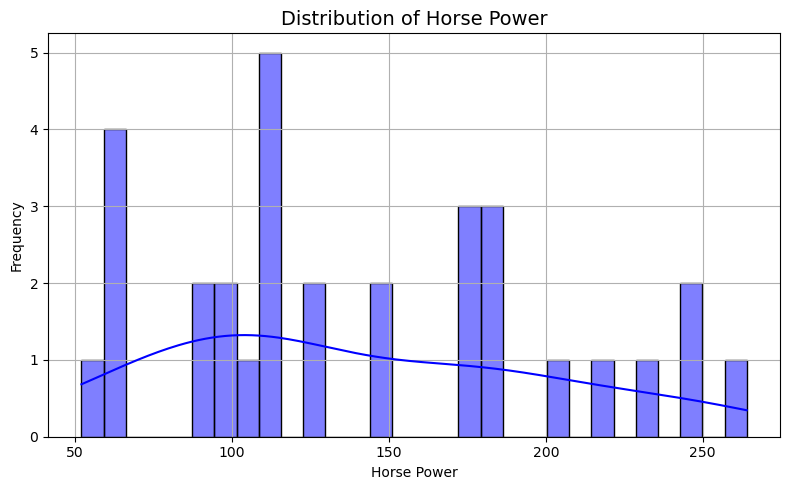

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_no_outliers, x=df_no_outliers['hp'], kde=True, bins=30, color='blue')
plt.title(f'Distribution of Horse Power', fontsize=14)
plt.xlabel('Horse Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

###### HISTORGRAM FOR WEIGHT, CYL & MILES PER GALLON(MPG)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


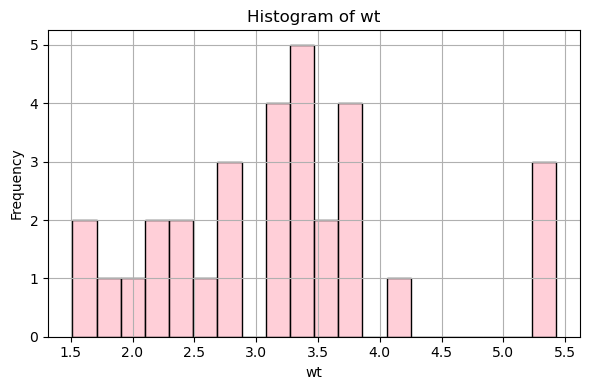

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


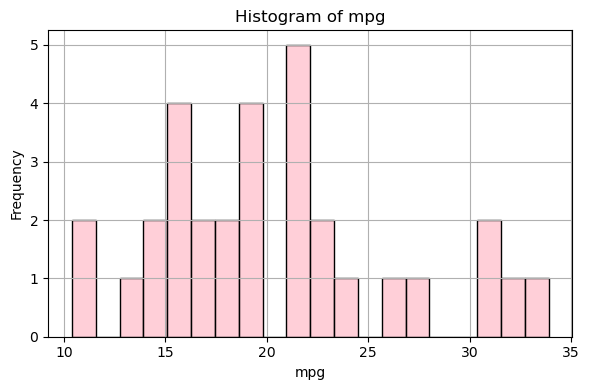

In [26]:
cols = ['wt','mpg']
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, color='pink', kde=False)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##### PIE CHART FOR NO OF CYLS

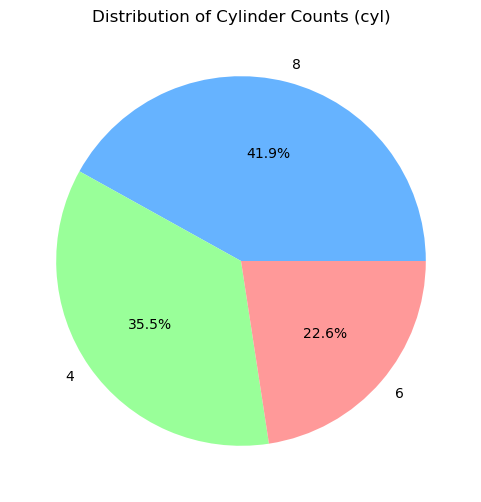

In [27]:
plt.figure(figsize=(6, 6))
c = df['cyl'].value_counts()
plt.pie(c, labels=c.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Distribution of Cylinder Counts (cyl)')
plt.show()

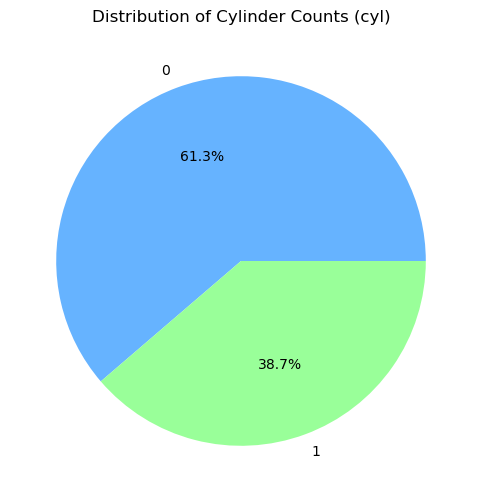

In [28]:
plt.figure(figsize=(6, 6))
c = df_no_outliers['am'].value_counts()
plt.pie(c, labels=c.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Distribution of Cylinder Counts (cyl)')
plt.show()

#### BIVARIATE ANALYSIS

##### SCATTER PLOT

In [29]:
sns.set(style="darkgrid")

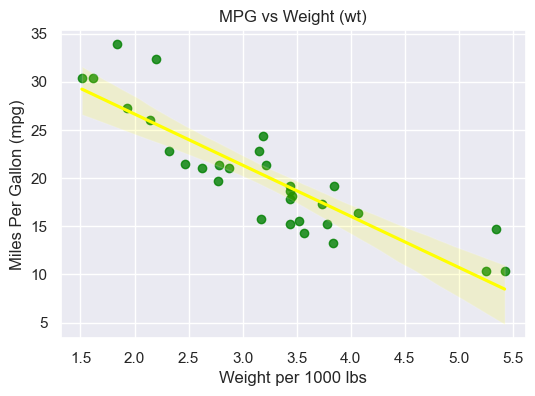

In [30]:
plt.figure(figsize=(6, 4))
sns.regplot(x='wt', y='mpg', data=df_no_outliers, scatter_kws={"color": "green"}, line_kws={"color": "yellow"})
plt.title('MPG vs Weight (wt)')
plt.xlabel('Weight per 1000 lbs')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

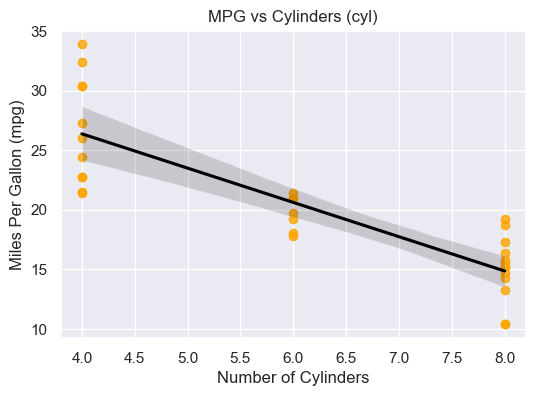

In [31]:
plt.figure(figsize=(6, 4))
sns.regplot(x='cyl', y='mpg', data=df_no_outliers, scatter_kws={"color": "orange"}, line_kws={"color": "black"})
plt.title('MPG vs Cylinders (cyl)')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

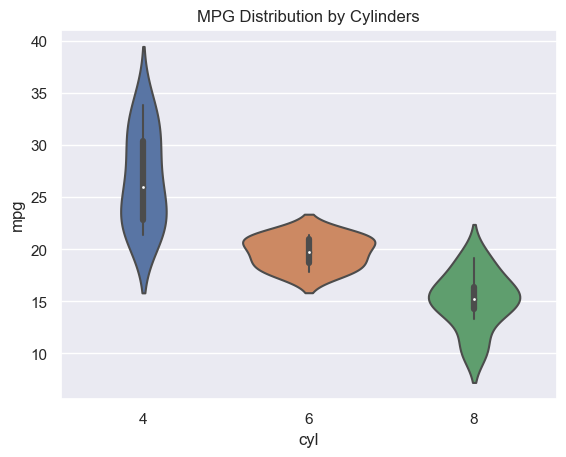

In [32]:
sns.violinplot(x='cyl', y='mpg', data=df_no_outliers)
plt.title('MPG Distribution by Cylinders')
plt.show()

MULTIVARIATE ANALYSIS

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


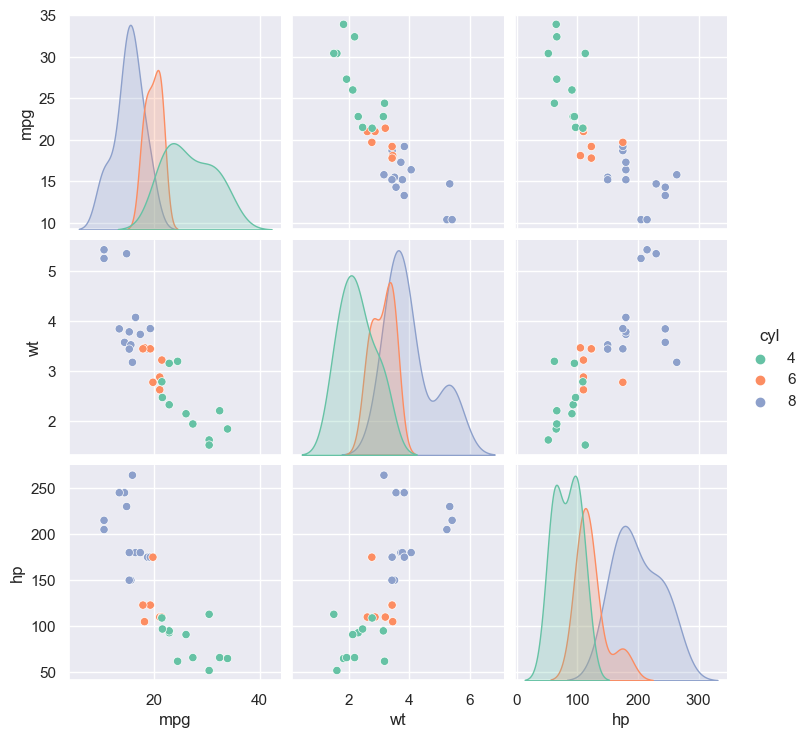

In [33]:
sns.pairplot(df[['mpg', 'wt', 'hp', 'cyl']],hue='cyl',palette='Set2')
plt.show()

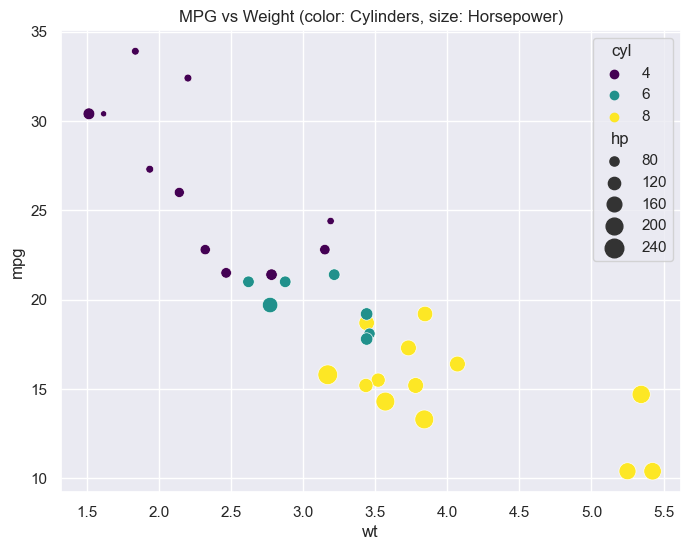

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_no_outliers, x='wt', y='mpg', hue='cyl', size='hp', sizes=(20, 200), palette='viridis'
)
plt.title('MPG vs Weight (color: Cylinders, size: Horsepower)')
plt.show()

In [35]:
colors = sns.color_palette("Set3", n_colors=len(df_no_outliers.columns))

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

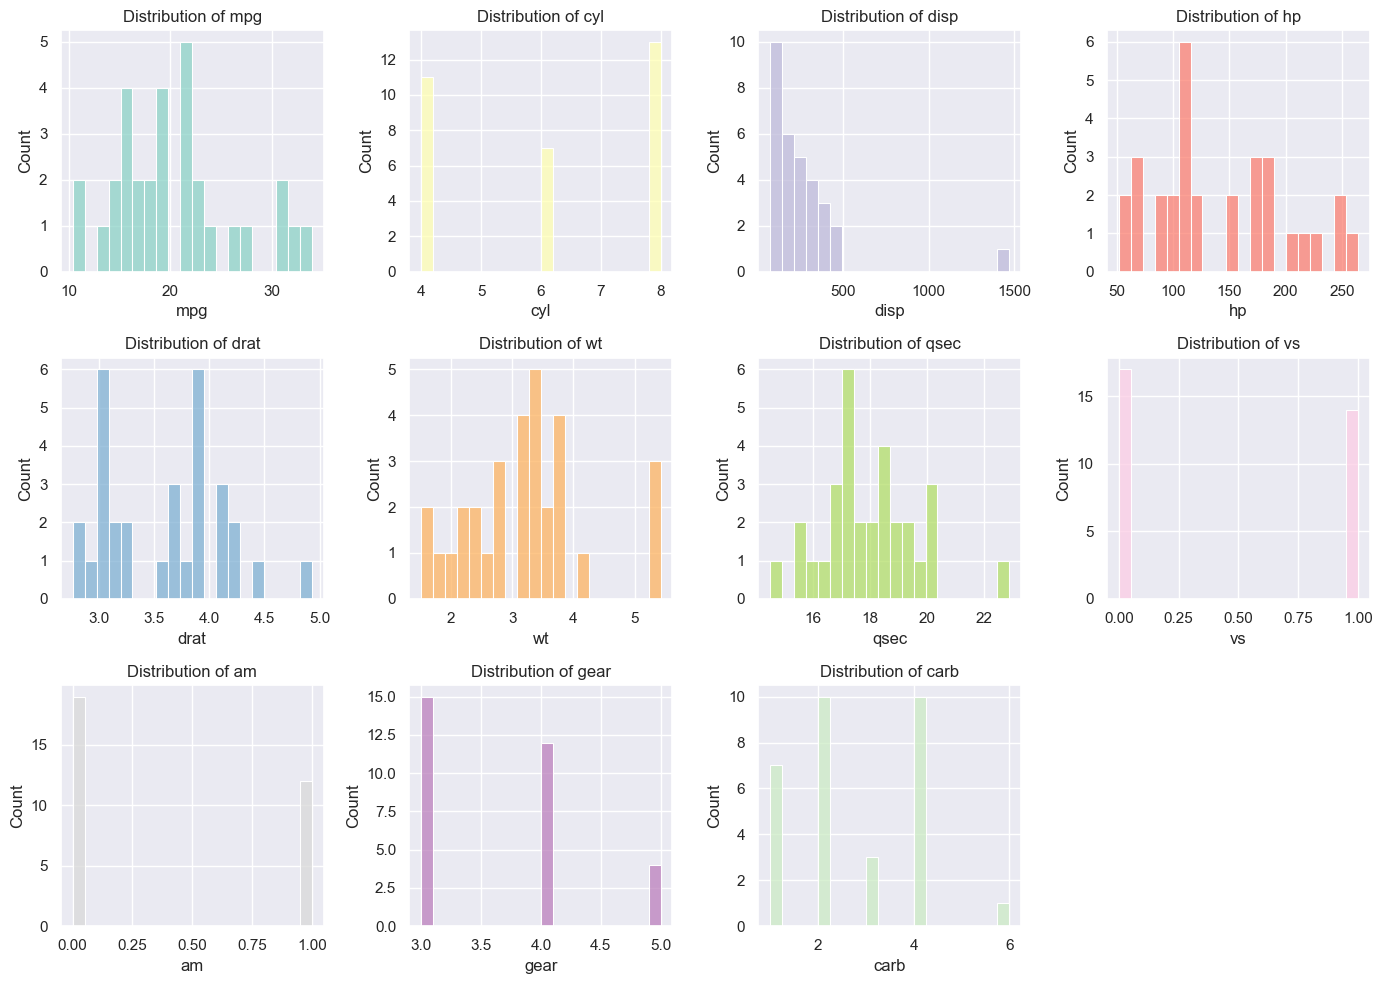

In [36]:
df_no_outliers_cols = df_no_outliers.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(df_no_outliers_cols):
    sns.histplot(df_no_outliers[col], ax=axes[i], color=colors[i], bins=20)
    axes[i].set_title(f'Distribution of {col}')

#removing the grid columns with no data
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### SHAPIRO TEST OF NORMALCY

In [37]:

# Shapiro-Wilk test for each numeric column
print("Shapiro-Wilk Test (p-values):\n")
for col in df_no_outliers.select_dtypes(include='number').columns:
    stat, p = shapiro(df_no_outliers[col])
    status = "Normal" if p > 0.05 else "Not Normal"
    print(f"{col:>6}: p = {p:.4f}  →  {status}")


Shapiro-Wilk Test (p-values):

   mpg: p = 0.1867  →  Normal
   cyl: p = 0.0000  →  Not Normal
  disp: p = 0.0000  →  Not Normal
    hp: p = 0.0721  →  Normal
  drat: p = 0.0772  →  Normal
    wt: p = 0.1097  →  Normal
  qsec: p = 0.5781  →  Normal
    vs: p = 0.0000  →  Not Normal
    am: p = 0.0000  →  Not Normal
  gear: p = 0.0000  →  Not Normal
  carb: p = 0.0012  →  Not Normal


In [82]:
#APPLYING LINEAR REGRESSION
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_no_outliers[['wt']]
y = df_no_outliers['mpg'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.6, random_state=21)

In [39]:
y_boxcox, lambda_ = boxcox(df_no_outliers['mpg'])

In [40]:
y = np.log(y_boxcox)

In [52]:
print(X.shape)
print(y.shape)

(31, 4)
(31,)


In [84]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
residuals = y_test - predictions

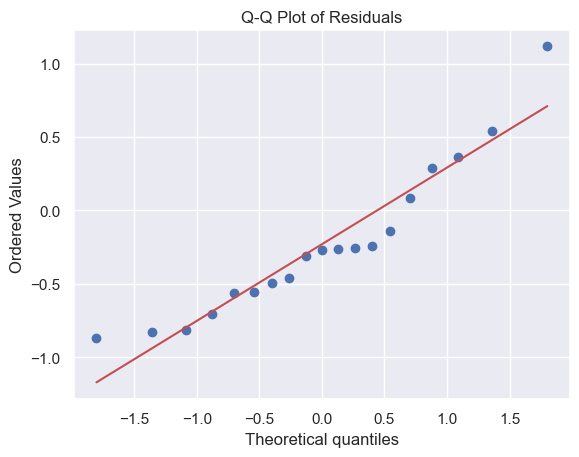

In [87]:

residuals_flat = residuals.ravel()  
# Q-Q plot
stats.probplot(residuals_flat, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

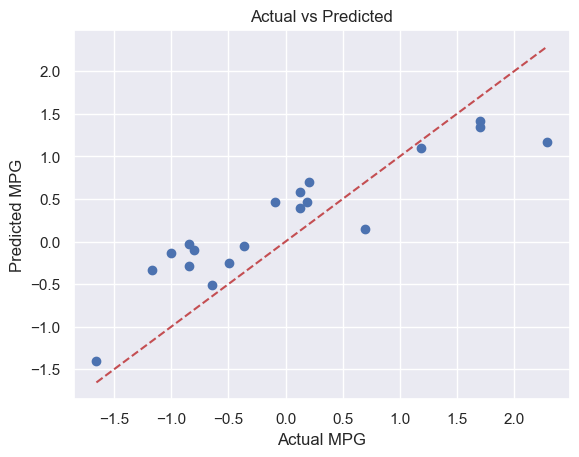

In [91]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal fit line
plt.grid(True)
plt.show()


In [86]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.30654721527800977
R2 Score: 0.723080031061808


### IMPROVING THE MODEL USING RIDGE REGRESSION

In [104]:
X = df_no_outliers[['wt', 'hp', 'disp','cyl']]  # Add any relevant features
y = df_no_outliers['mpg']

In [105]:


# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale both X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Hyperparameter grid
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train_scaled, y_train_scaled)

# Best model
best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test_scaled, y_pred_ridge)
mse = mean_squared_error(y_test_scaled, y_pred_ridge)

print("🔧 Best Alpha:", grid_ridge.best_params_['alpha'])
print(" Ridge R² Score:", r2)
print(" Ridge MSE:", mse)

🔧 Best Alpha: 10
 Ridge R² Score: 0.77450119728494
 Ridge MSE: 0.2858268235887919


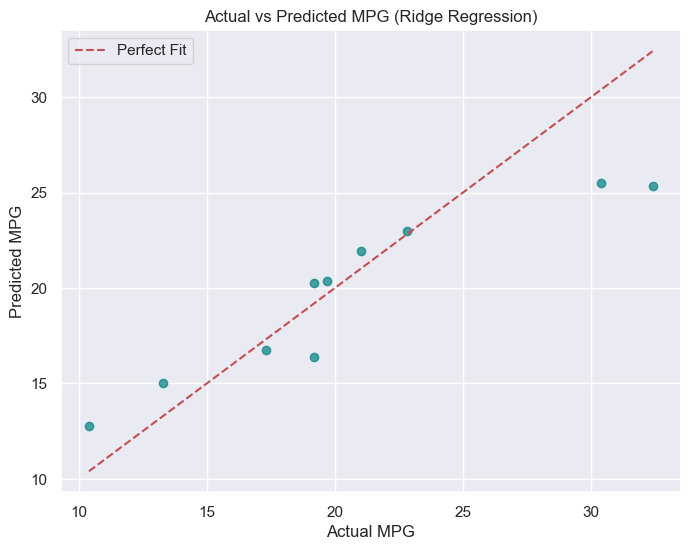

In [108]:
# Inverse transform y_test and predictions to original MPG scale
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()
y_pred_orig = scaler_y.inverse_transform(y_pred_ridge.reshape(-1, 1)).ravel()

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred_orig, color='teal', alpha=0.7)
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()],
         'r--', label='Perfect Fit')

plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Ridge Regression)")
plt.legend()
plt.grid(True)
plt.show()
